In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# reproducibility
np.random.seed(10)

# number of observations
size = 500

# feature setup
airplane_type = np.random.choice(a=range(3), size=size)
nr_passengers = np.random.choice(a=range(1000, 1000000), size=size)
airpl_gas_type = np.random.choice(a=range(2), size=size)
accesible_region = np.random.choice(a=range(6), size=size)
year = np.random.choice(a=range(1950,2022), size=size)
month = np.random.choice(a=range(12), size=size)
airport_size = np.random.exponential(scale=1.0, size=size)
nr_shops = np.random.choice(a=range(10), size=size)
nr_cafes = np.random.choice(a=range(10), size=size)
hotel = np.random.choice(a=range(2), size=size)
#nereikia -> is formules
y_airport_profit = np.random.choice(a=range(100000, 10000000), size=size)
nr_employees = np.random.choice(a=range(20,1000), size=size)


In [3]:
# #Dataframe for linear regression
data = {'nr_passengers': nr_passengers,
        'nr_cafes' : nr_cafes,
        'nr_shops' : nr_shops,
        'airport_size' : airport_size}
df = pd.DataFrame(data)
print(df)

     nr_passengers  nr_cafes  nr_shops  airport_size
0           800320         9         3      1.360991
1           187600         9         0      0.393009
2           803970         2         0      0.397772
3           205112         8         9      0.894147
4           381022         5         6      0.465244
..             ...       ...       ...           ...
495         282787         1         9      1.838016
496         250849         9         2      4.381274
497          69396         1         6      2.425973
498         930334         3         1      0.333774
499         233471         3         7      1.451432

[500 rows x 4 columns]


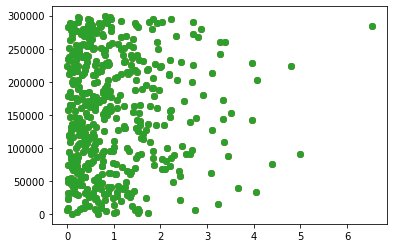

In [52]:
#y_airport_profit = a*nr_passengers+b*nr_cafes+c*nr_shops+d*airport_size+errror
a = 0.3
b = 0.7
c = 0.5
for i in range(3):
    d = np.random.normal(loc=1, scale=.5)
    error = np.random.normal(loc=0, scale=np.random.choice([0.1, 0.5, 1]), size=size)
    y = a*df['nr_passengers']+b*df['nr_cafes']+c*df['nr_shops']+d*df['airport_size']+error
    plt.scatter(df['airport_size'], y)


In [42]:
#modelis
y = a*df['nr_passengers']+b*df['nr_cafes']+c*df['nr_shops']+d*df['airport_size']+error

In [46]:
#train, test datasets
train_size=0.8 #split the data in 80:10:10 for train:valid:test dataset

X = df.copy()
y = y
 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Online metrika?

#Offline metrika
reg = LinearRegression().fit(xtrain, ytrain)

#print the coefficients
print(reg.intercept_)
print(reg.coef_)

#predictions based on model
ypred = reg.predict(xtest)

#R^2 also accuracy?
#Accuracy is a measure for the closeness of the measurements to a specific value,
reg.score(X, y)
reg.score(xtest, ytest, sample_weight=None) 

#https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
#MAE
print(metrics.mean_absolute_error(ytest, ypred))
#MSE
print(metrics.mean_squared_error(y, ypred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y, ypred)))

-0.1834869367594365
[0.29999993 0.70004403 0.53594405 1.06989994]
0.8100894496139927


ValueError: Found input variables with inconsistent numbers of samples: [500, 100]